# Import Libraries

In [1]:
import json

import matplotlib.pyplot as plt
import pandas as pd

from src.process_data.clean import Clean

# Load Data

In [2]:
train_path = "data/train.csv"
test_path = "data/test.csv"
sample_submission_path = "data/sample_submission.csv"
data_dictionary_path = "data/data_dictionary.csv"

In [3]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
sample_submission_df = pd.read_csv(sample_submission_path)
data_dictionary_df = pd.read_csv(data_dictionary_path)

# Analyze Data

### General

In [4]:
train_df.fillna("nan")

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,nan,No,nan,nan,No TBI,No,6.0,...,nan,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,nan,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,nan,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,28795,Intermediate - TED AML case <missing cytogenetics,nan,Favorable,No,2.0,8.0,No TBI,No,6.0,...,Bi-directional non-permissive,nan,"N/A, Mel not given",8.0,nan,2.0,No,10.0,0.0,18.633
28796,28796,High,No,Poor,Yes,1.0,4.0,No TBI,No,5.0,...,GvH non-permissive,Related,"N/A, Mel not given",6.0,Yes,1.0,Yes,8.0,1.0,4.892
28797,28797,TBD cytogenetics,nan,Poor,nan,2.0,8.0,No TBI,nan,6.0,...,GvH non-permissive,Unrelated,"N/A, Mel not given",8.0,nan,2.0,No,10.0,0.0,23.157
28798,28798,N/A - non-malignant indication,No,Poor,No,1.0,4.0,No TBI,No,3.0,...,Permissive mismatched,Related,MEL,4.0,No,1.0,No,5.0,0.0,52.351


In [5]:
print(json.dumps(list(train_df.columns), indent=2))
print(len(train_df.columns))

[
  "ID",
  "dri_score",
  "psych_disturb",
  "cyto_score",
  "diabetes",
  "hla_match_c_high",
  "hla_high_res_8",
  "tbi_status",
  "arrhythmia",
  "hla_low_res_6",
  "graft_type",
  "vent_hist",
  "renal_issue",
  "pulm_severe",
  "prim_disease_hct",
  "hla_high_res_6",
  "cmv_status",
  "hla_high_res_10",
  "hla_match_dqb1_high",
  "tce_imm_match",
  "hla_nmdp_6",
  "hla_match_c_low",
  "rituximab",
  "hla_match_drb1_low",
  "hla_match_dqb1_low",
  "prod_type",
  "cyto_score_detail",
  "conditioning_intensity",
  "ethnicity",
  "year_hct",
  "obesity",
  "mrd_hct",
  "in_vivo_tcd",
  "tce_match",
  "hla_match_a_high",
  "hepatic_severe",
  "donor_age",
  "prior_tumor",
  "hla_match_b_low",
  "peptic_ulcer",
  "age_at_hct",
  "hla_match_a_low",
  "gvhd_proph",
  "rheum_issue",
  "sex_match",
  "hla_match_b_high",
  "race_group",
  "comorbidity_score",
  "karnofsky_score",
  "hepatic_mild",
  "tce_div_match",
  "donor_related",
  "melphalan_dose",
  "hla_low_res_8",
  "cardiac",
  "h

In [6]:
print(json.dumps(list(test_df.columns), indent=2))
print(len(test_df.columns))

[
  "ID",
  "dri_score",
  "psych_disturb",
  "cyto_score",
  "diabetes",
  "hla_match_c_high",
  "hla_high_res_8",
  "tbi_status",
  "arrhythmia",
  "hla_low_res_6",
  "graft_type",
  "vent_hist",
  "renal_issue",
  "pulm_severe",
  "prim_disease_hct",
  "hla_high_res_6",
  "cmv_status",
  "hla_high_res_10",
  "hla_match_dqb1_high",
  "tce_imm_match",
  "hla_nmdp_6",
  "hla_match_c_low",
  "rituximab",
  "hla_match_drb1_low",
  "hla_match_dqb1_low",
  "prod_type",
  "cyto_score_detail",
  "conditioning_intensity",
  "ethnicity",
  "year_hct",
  "obesity",
  "mrd_hct",
  "in_vivo_tcd",
  "tce_match",
  "hla_match_a_high",
  "hepatic_severe",
  "donor_age",
  "prior_tumor",
  "hla_match_b_low",
  "peptic_ulcer",
  "age_at_hct",
  "hla_match_a_low",
  "gvhd_proph",
  "rheum_issue",
  "sex_match",
  "hla_match_b_high",
  "race_group",
  "comorbidity_score",
  "karnofsky_score",
  "hepatic_mild",
  "tce_div_match",
  "donor_related",
  "melphalan_dose",
  "hla_low_res_8",
  "cardiac",
  "h

In [8]:
print(train_df['efs'][train_df['efs'] == 0].shape[0] / train_df.shape[0] * 100)

46.06944444444444


In [9]:
train_df = Clean.clean(train_df)


for column in train_df.columns:
    print(f"#################### {column}, {train_df[column].dtype}")
    print(train_df[column].unique())
    print("\n\n")

['N/A - non-malignant indication', 'Intermediate', 'High', 'Low', 'N/A - disease not classifiable', 'N/A - pediatric', 'TBD cytogenetics', 'Intermediate - TED AML case <missing cytogenetics', 'High - TED AML case <missing cytogenetics', 'Very high', 'Missing disease status']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
['No', 'Not done', 'Yes']
[0, 1, 2]
['Intermediate', 'Poor', 'Other', 'Favorable', 'TBD', 'Normal', 'Not tested']
[0, 1, 2, 3, 4, 5, 6]
['No', 'Yes', 'Not done']
[0, 1, 2]
['No TBI', 'TBI +- Other, >cGy', 'TBI + Cy +- Other', 'TBI +- Other, <=cGy', 'TBI +- Other, unknown dose', 'TBI +- Other, -cGy, fractionated', 'TBI +- Other, -cGy, single', 'TBI +- Other, -cGy, unknown dose']
[0, 1, 2, 3, 4, 5, 6, 7]
['No', 'Yes', 'Not done']
[0, 1, 2]
['Bone marrow', 'Peripheral blood']
[0, 1]
['No', 'Yes']
[0, 1]
['No', 'Yes', 'Not done']
[0, 1, 2]
['No', 'Yes', 'Not done']
[0, 1, 2]
['IEA', 'AML', 'HIS', 'ALL', 'MPN', 'IIS', 'Solid tumor', 'Other leukemia', 'PCD', 'IPA', 'IMD', 'MDS', 'NHL', 

/home/solazu-ai/Desktop/thai/CIBMTR---Equity-in-post-HCT-Survival-Predictions/src/process_data/clean.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(method="bfill", inplace=True)
/home/solazu-ai/Desktop/thai/CIBMTR---Equity-in-post-HCT-Survival-Predictions/src/process_data/clean.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[column].fillna(method="bfill", inplace=True)
/home/solazu-ai/Desktop/thai/CIBMTR

['BM', 'PB']
[0, 1]
['Intermediate', 'TBD', 'Poor', 'Favorable', 'Not tested']
[0, 1, 2, 3, 4]
['MAC', 'RIC', 'NMA', 'TBD', 'No drugs reported', 'N/A, F(pre-TED) not submitted']
[0, 1, 2, 3, 4, 5]
['Not Hispanic or Latino', 'Hispanic or Latino', 'Non-resident of the U.S.']
[0, 1, 2]
['No', 'Yes', 'Not done']
[0, 1, 2]
['Positive', 'Negative']
[0, 1]
['Yes', 'No']
[0, 1]
['Permissive', 'HvG non-permissive', 'Fully matched', 'GvH non-permissive']
[0, 1, 2, 3]
['No', 'Yes', 'Not done']
[0, 1, 2]
['No', 'Yes', 'Not done']
[0, 1, 2]
['No', 'Yes', 'Not done']
[0, 1, 2]
['FKalone', 'Other GVHD Prophylaxis', 'Cyclophosphamide alone', 'FK+ MMF +- others', 'TDEPLETION +- other', 'CSA + MMF +- others(not FK)', 'CSA + MTX +- others(not MMF,FK)', 'FK+ MTX +- others(not MMF)', 'Cyclophosphamide +- others', 'CSA alone', 'TDEPLETION alone', 'No GvHD Prophylaxis', 'CDselect alone', 'CDselect +- other', 'Parent Q = yes, but no agent', 'FK+- others(not MMF,MTX)', 'CSA +- others(not FK,MMF,MTX)']
[0, 1, 2

In [10]:
categories_features = train_df.drop(['ID', 'efs_time', 'donor_age', 'age_at_hct'], axis=1)

dri_score


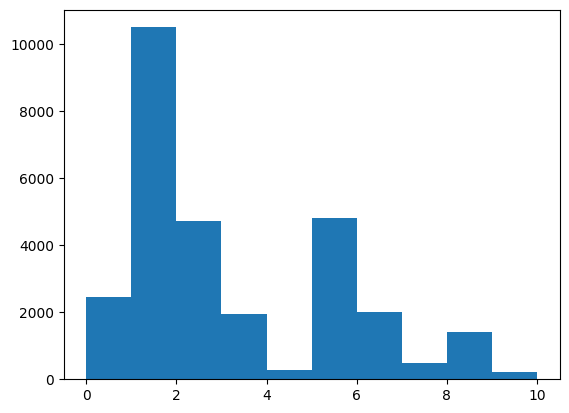

psych_disturb


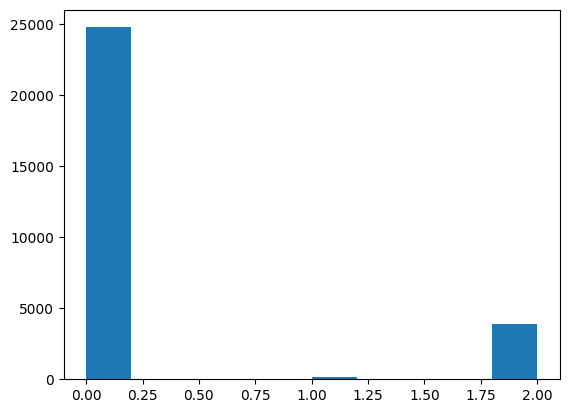

cyto_score


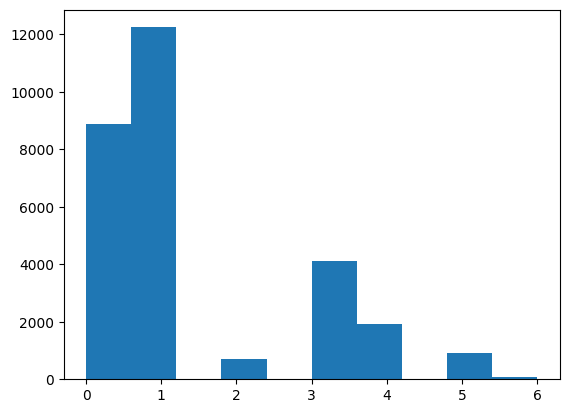

diabetes


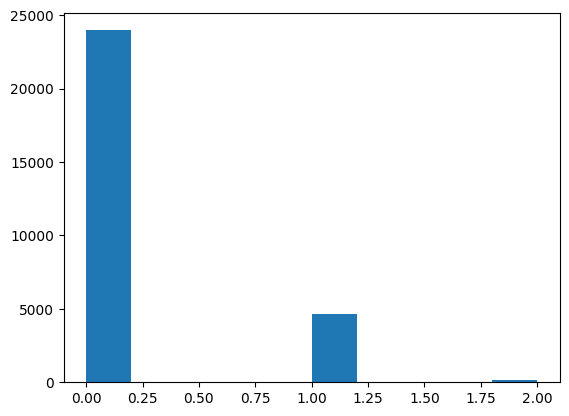

hla_match_c_high


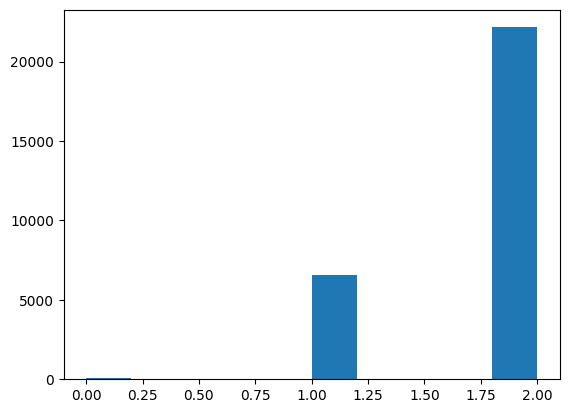

hla_high_res_8


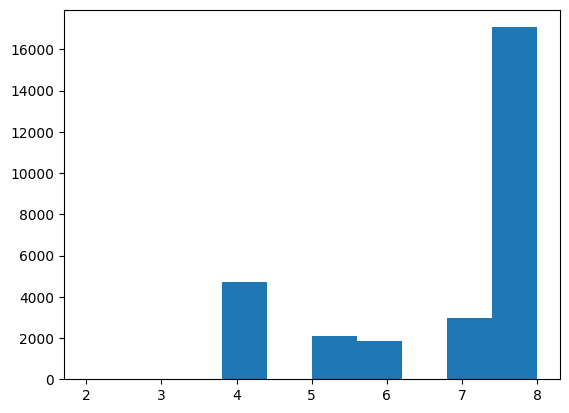

tbi_status


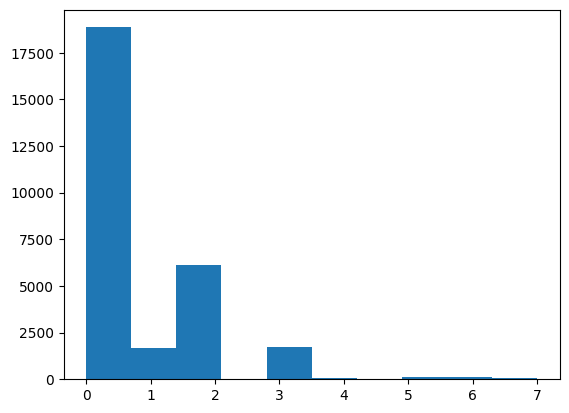

arrhythmia


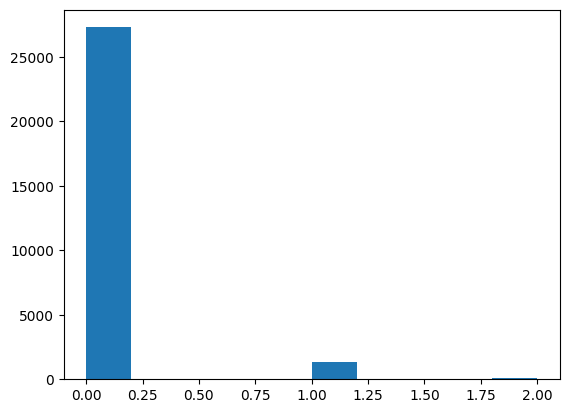

hla_low_res_6


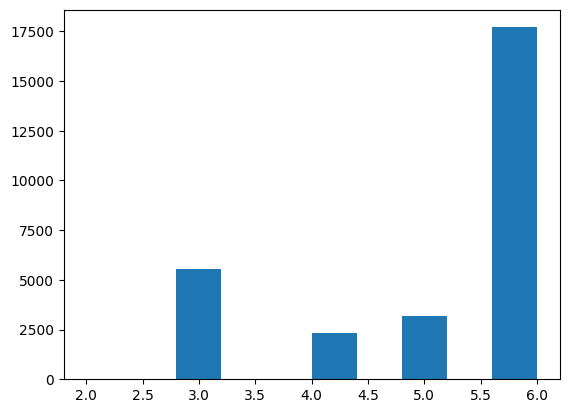

graft_type


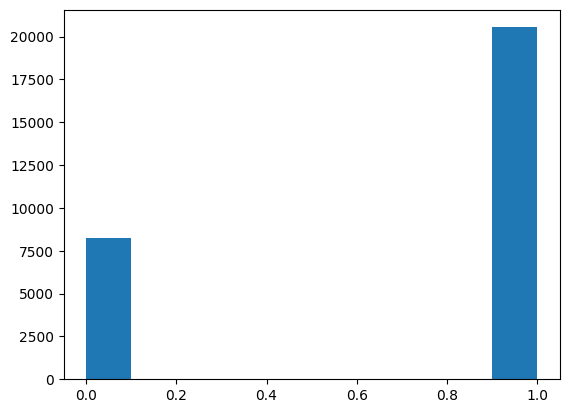

vent_hist


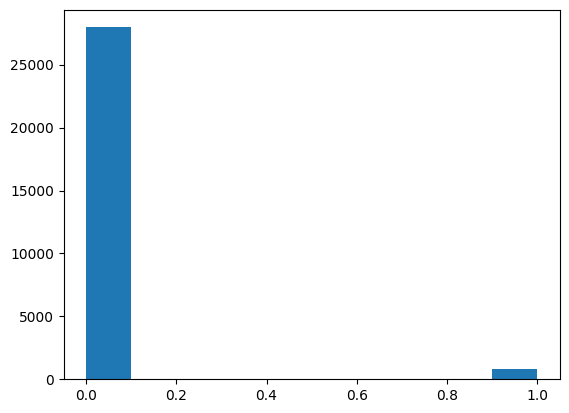

renal_issue


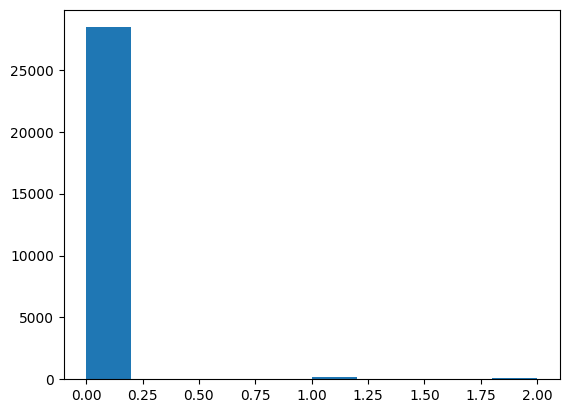

pulm_severe


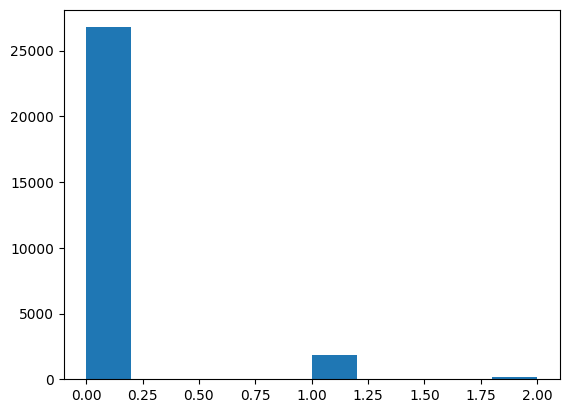

prim_disease_hct


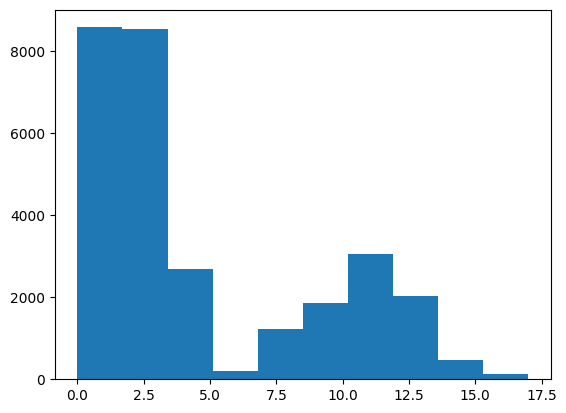

hla_high_res_6


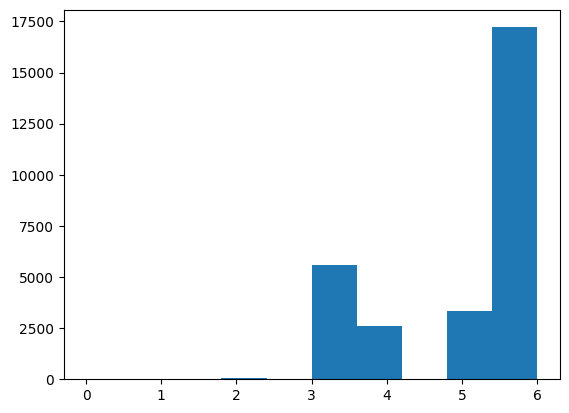

cmv_status


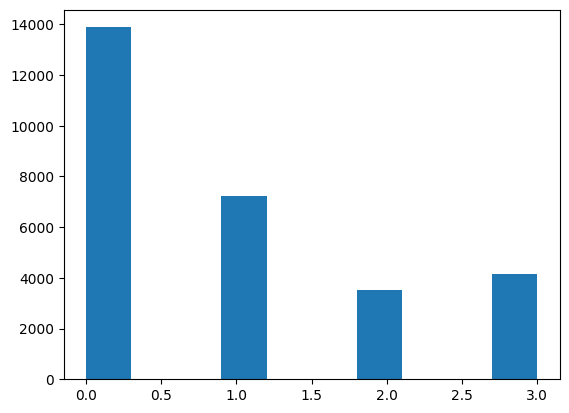

hla_high_res_10


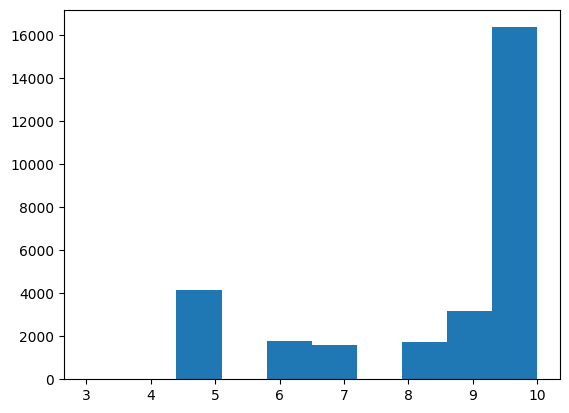

hla_match_dqb1_high


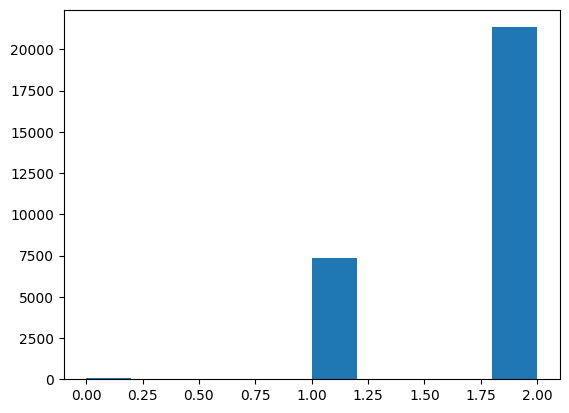

tce_imm_match


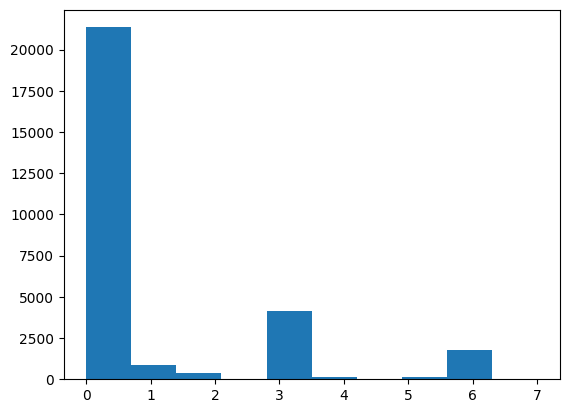

hla_nmdp_6


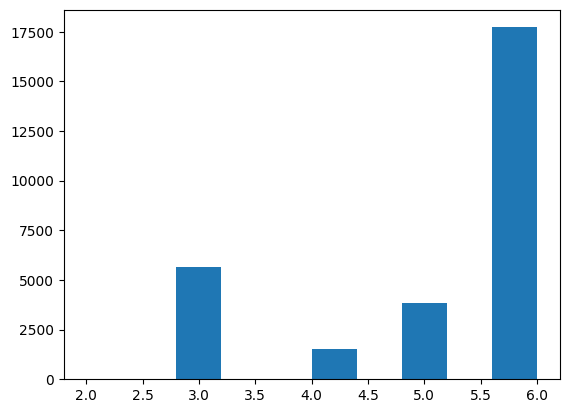

hla_match_c_low


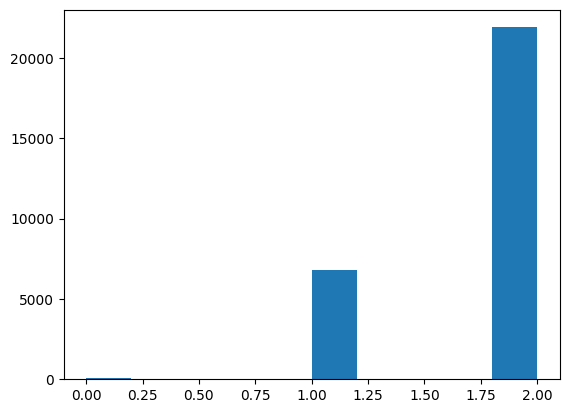

rituximab


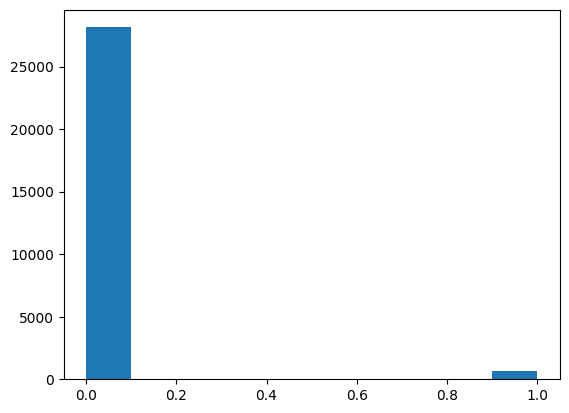

hla_match_drb1_low


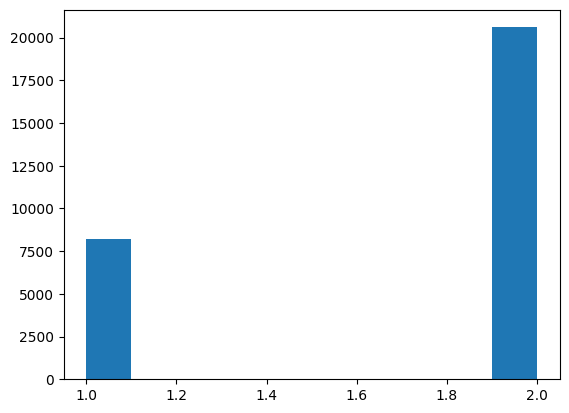

hla_match_dqb1_low


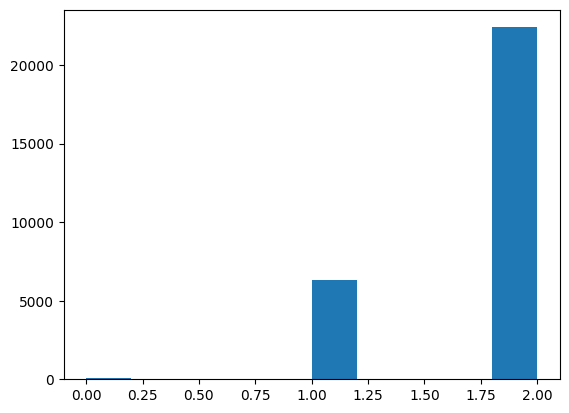

prod_type


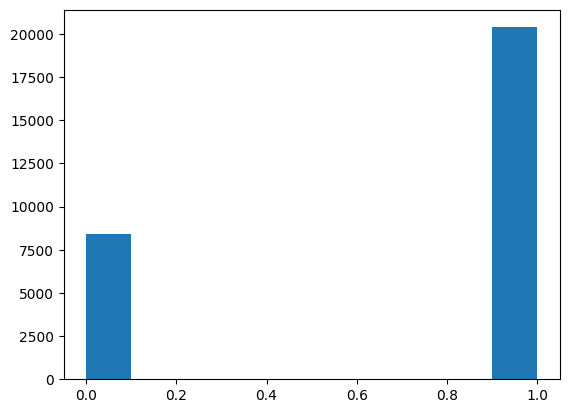

cyto_score_detail


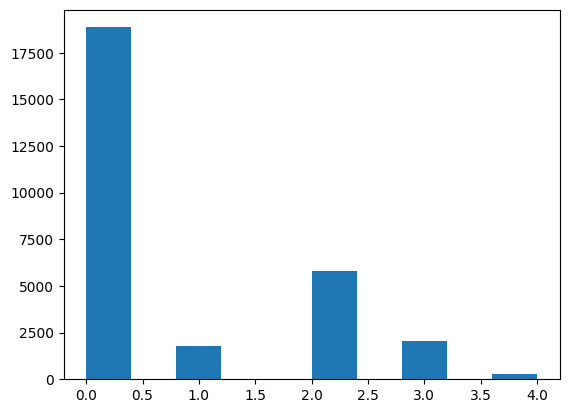

conditioning_intensity


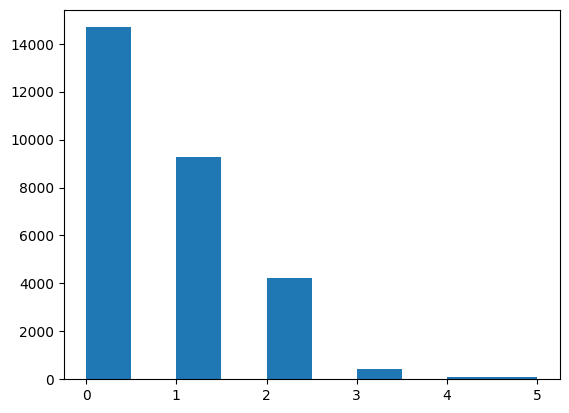

ethnicity


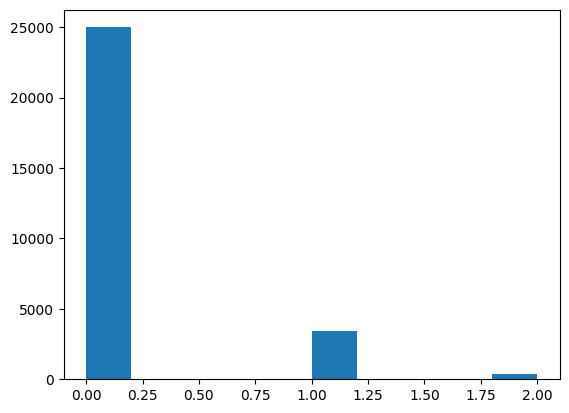

year_hct


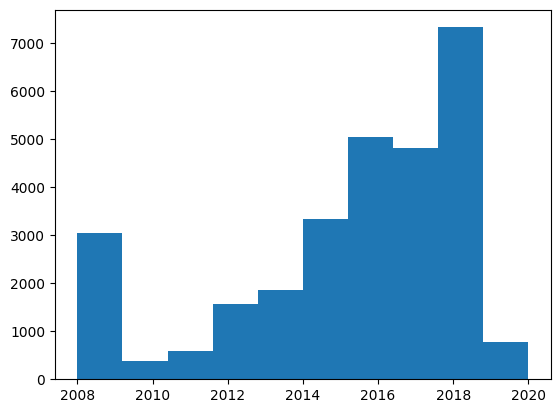

obesity


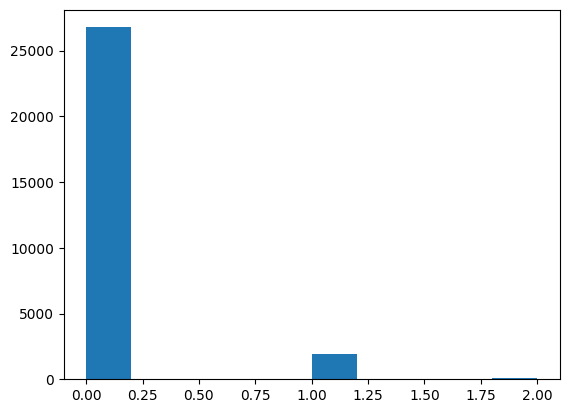

mrd_hct


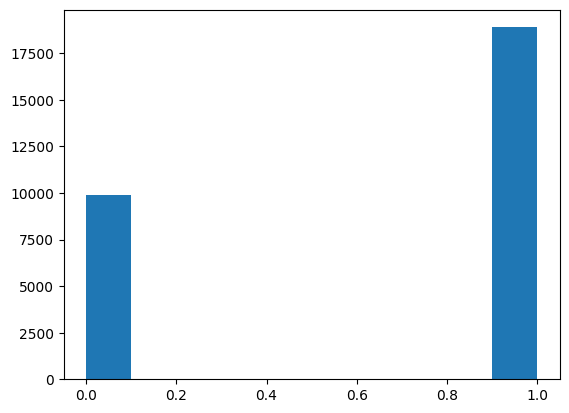

in_vivo_tcd


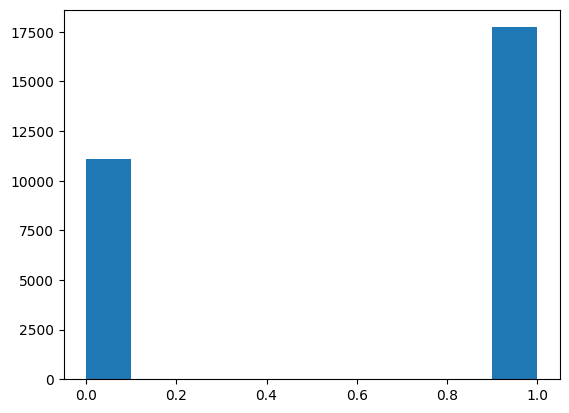

tce_match


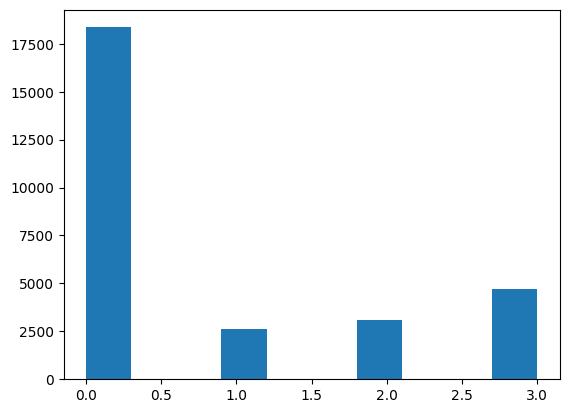

hla_match_a_high


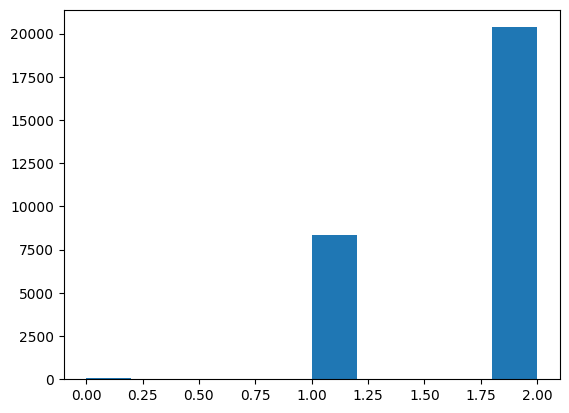

hepatic_severe


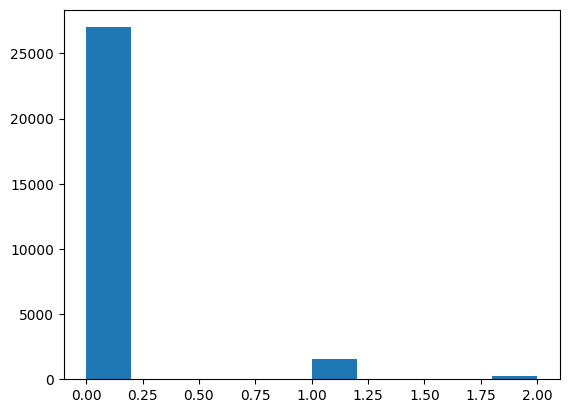

prior_tumor


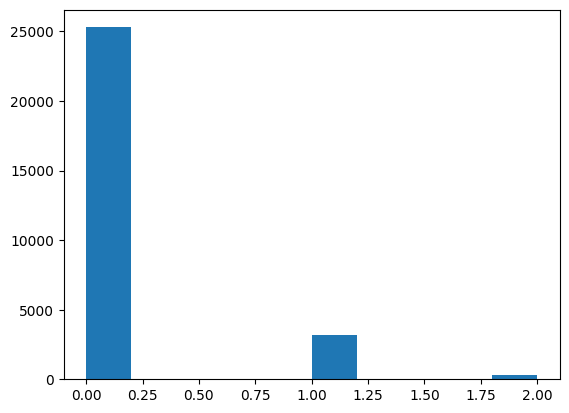

hla_match_b_low


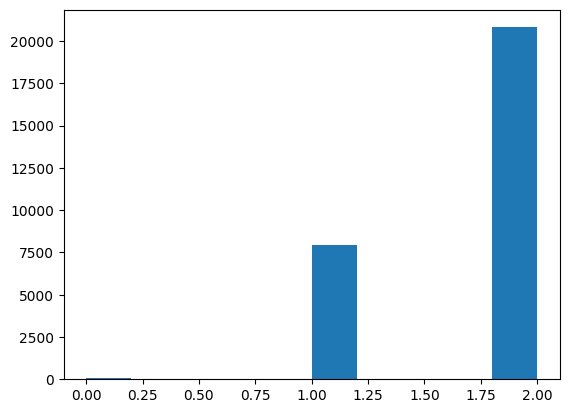

peptic_ulcer


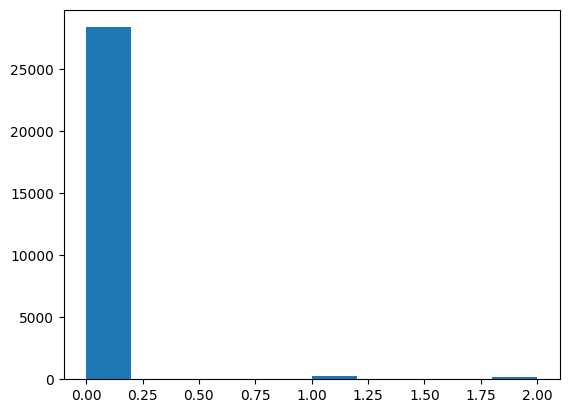

hla_match_a_low


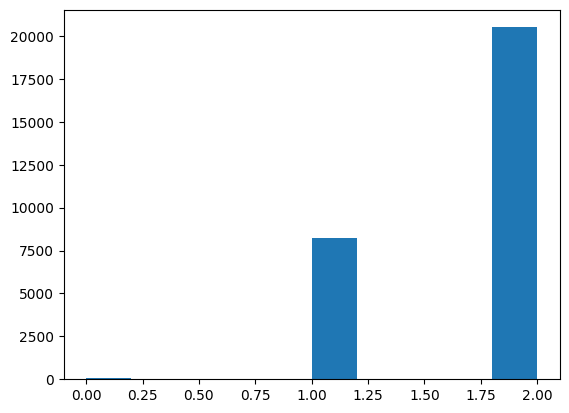

gvhd_proph


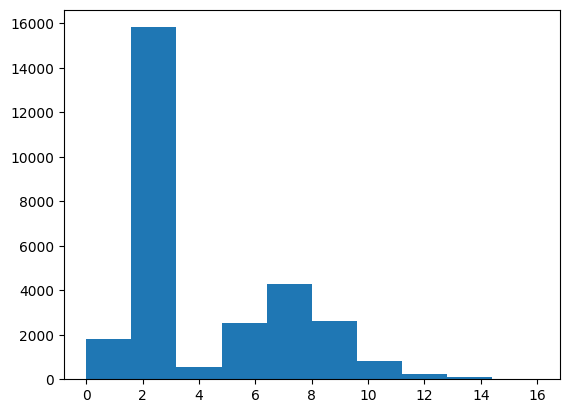

rheum_issue


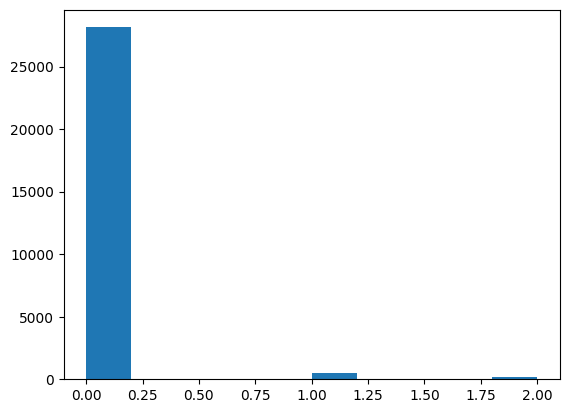

sex_match


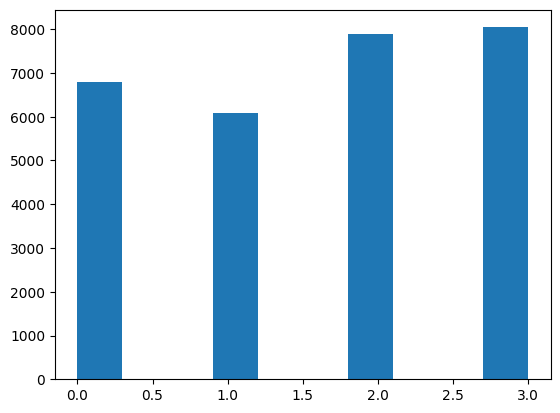

hla_match_b_high


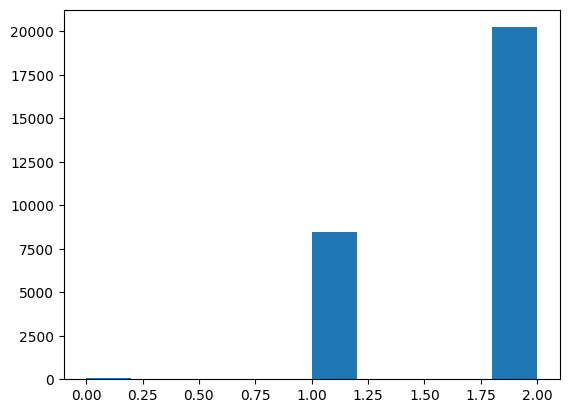

race_group


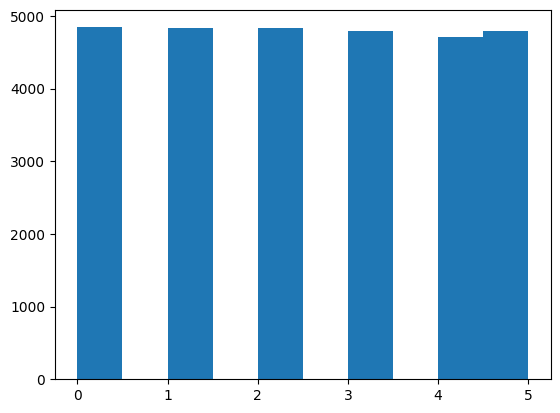

comorbidity_score


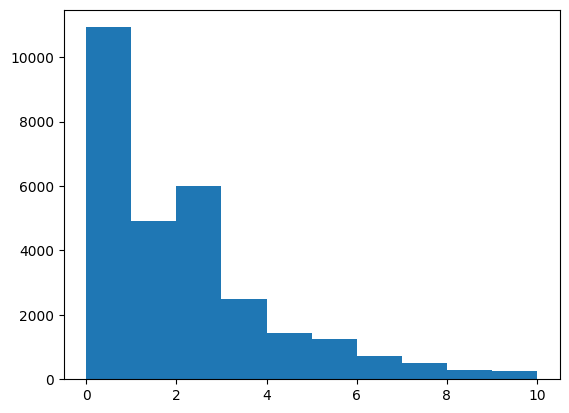

karnofsky_score


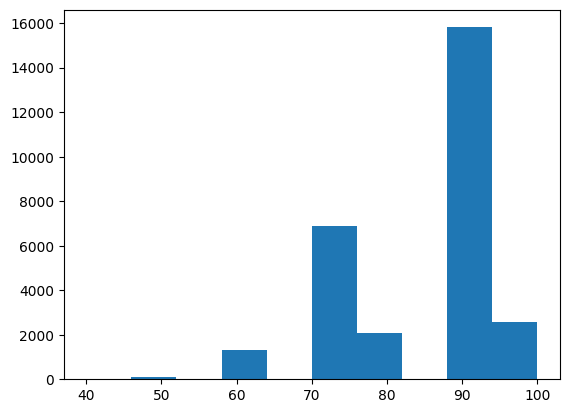

hepatic_mild


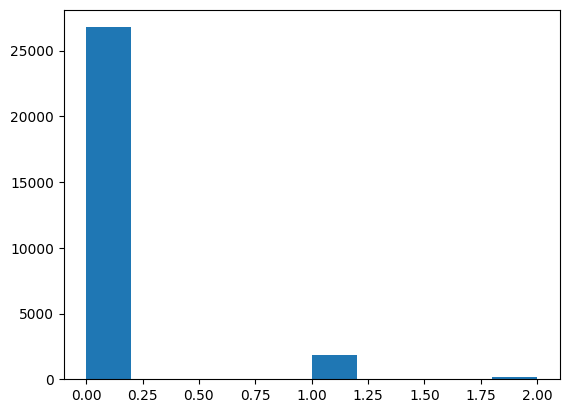

tce_div_match


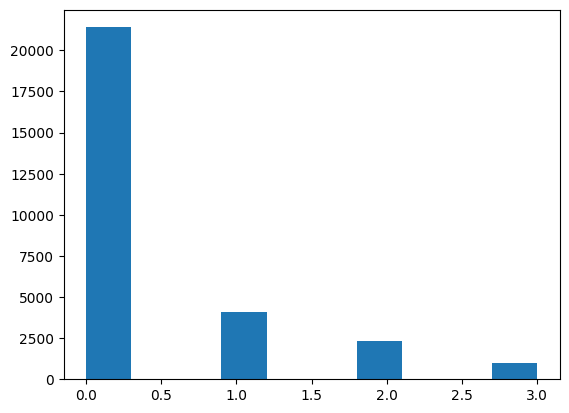

donor_related


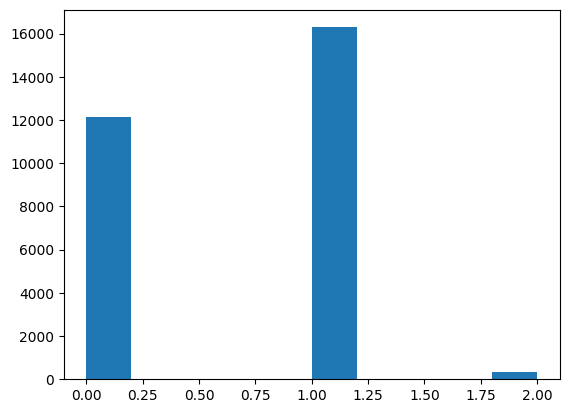

melphalan_dose


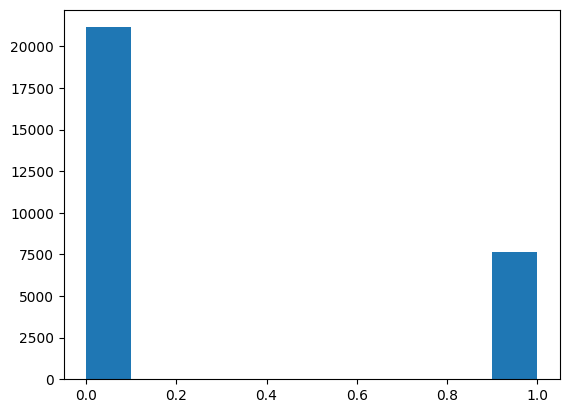

hla_low_res_8


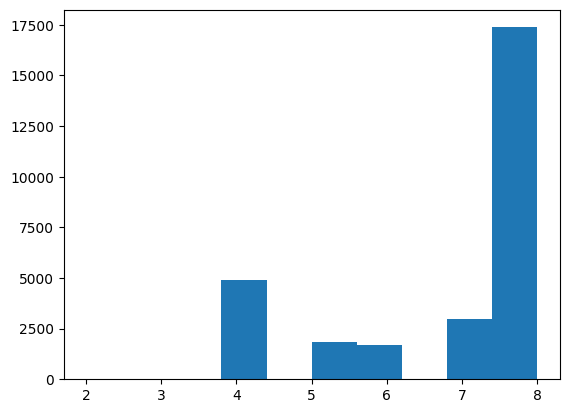

cardiac


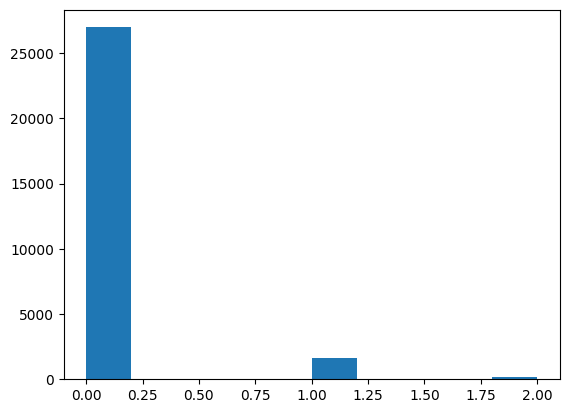

hla_match_drb1_high


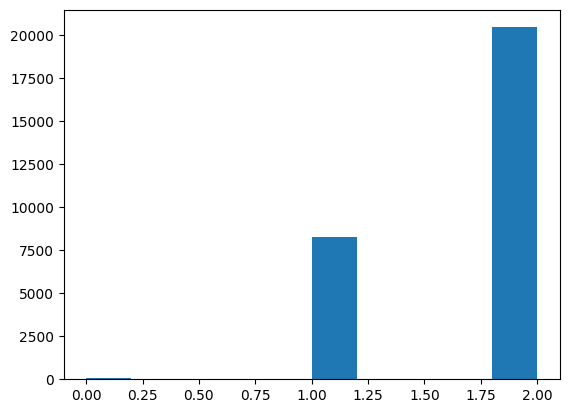

pulm_moderate


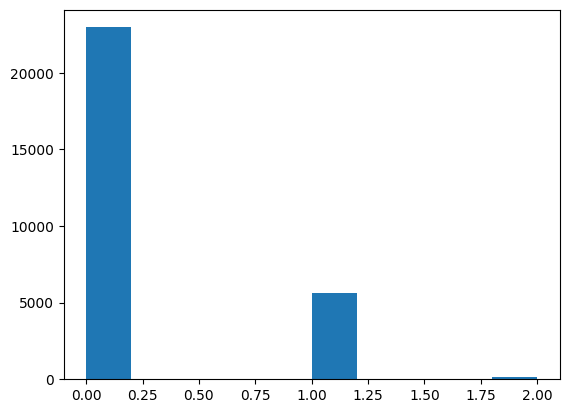

hla_low_res_10


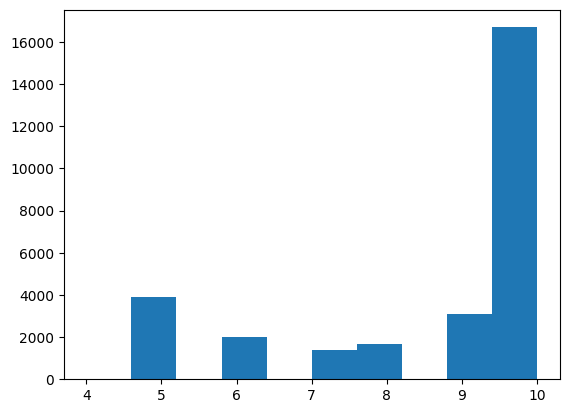

efs


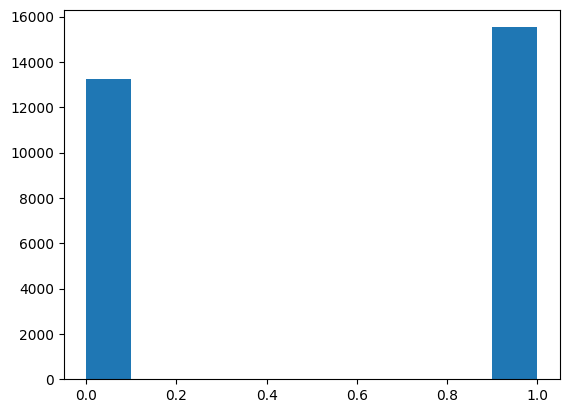

In [11]:
for feature in categories_features:
    print(feature)
    plt.hist(train_df.fillna("nan")[feature])
    plt.show()

In [13]:
train_df['efs'].dtype

dtype('float64')

In [14]:
data_dictionary_df

,variable,description,type,values
0,dri_score,Refined disease risk index,Categorical,['Intermediate' 'High' 'N/A - non-malignant in...
1,psych_disturb,Psychiatric disturbance,Categorical,['Yes' 'No' nan 'Not done']
2,cyto_score,Cytogenetic score,Categorical,['Intermediate' 'Favorable' 'Poor' 'TBD' nan '...
3,diabetes,Diabetes,Categorical,['No' 'Yes' nan 'Not done']
4,hla_match_c_high,Recipient / 1st donor allele level (high resol...,Numerical,NaN
5,hla_high_res_8,Recipient / 1st donor allele-level (high resol...,Numerical,NaN
6,tbi_status,TBI,Categorical,"['No TBI' 'TBI + Cy +- Other' 'TBI +- Other, <..."
7,arrhythmia,Arrhythmia,Categorical,['No' nan 'Yes' 'Not done']
8,hla_low_res_6,Recipient / 1st donor antigen-level (low resol...,Numerical,NaN
9,graft_type,Graft type,Categorical,['Peripheral blood' 'Bone marrow']
